# Floatsam test

In [1]:
# Some path wizardry to make python acknowledge relative paths, just ignore this part...
import sys; sys.path.append('..')
import csv
import networkx as nx
from ipysigma import Sigma
from pelote import (
    table_to_bipartite_graph,
    graph_to_edges_dataframe,
    graph_to_nodes_dataframe,
    monopartite_projection,
    connected_component_sizes,
    crop_to_largest_connected_component,
    remove_edges,
    floatsam
)

In [2]:
with open('./data/bipartite.csv') as f:
    bipartite = table_to_bipartite_graph(csv.DictReader(f), 'account', 'url')

In [3]:
graph = monopartite_projection(bipartite, 'account', metric='cosine')

In [4]:
graph.size()

95713

<AxesSubplot:ylabel='Frequency'>

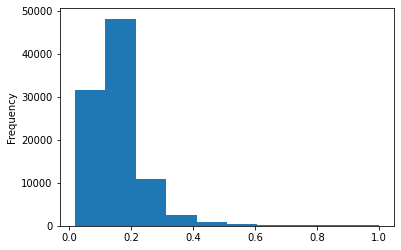

In [5]:
graph_to_edges_dataframe(graph).weight.plot.hist()

In [6]:
threshold = floatsam(graph)
threshold

0.3300000000000001

In [7]:
remove_edges(graph, lambda u, v, a: a['weight'] >= threshold)
crop_to_largest_connected_component(graph)

In [12]:
graph.size()

4422